### Check damaged and undamaged magnet configuration

- magnets were damaged 15 mm length, 3 mm depth (conservative)
- COMSOL file /Users/hkromer/02_PhD/02_Data/01_COMSOL/04.Microwave/02.damaged.mph and /Users/hkromer/02_PhD/02_Data/01_COMSOL/04.Microwave/01.undamaged.mph
- data is the centerline normBfield

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [14]:
fname_dmg = "/Users/hkromer/02_PhD/02_Data/01_COMSOL/04.Microwave/damaged.Bfield.csv"
fname_undmg = "/Users/hkromer/02_PhD/02_Data/01_COMSOL/04.Microwave/undamaged.Bfield.csv"

In [15]:
df_dmg = pd.read_csv(fname_dmg, skiprows=8)
df_dmg.columns = ['x', 'y', 'z', 'normB']
df_dmg = df_dmg.sort_values(by=['x'])

df_undmg = pd.read_csv(fname_undmg, skiprows=8)
df_undmg.columns = ['x', 'y', 'z', 'normB']
df_undmg = df_undmg.sort_values(by=['x'])


## Plot absolute values

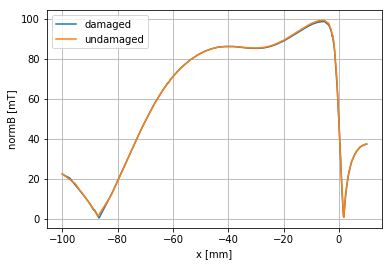

In [16]:
plt.plot(df_dmg['x'], df_dmg['normB'], label='damaged')
plt.plot(df_undmg['x'], df_undmg['normB'], label='undamaged')
plt.legend()
plt.grid()
plt.xlabel('x [mm]')
plt.ylabel('normB [mT]')
plt.show()

## Plot relative difference

In [29]:
X_dmg = df_dmg['x']
Y_dmg = df_dmg['normB']
f_dmg = interp1d(X_dmg, Y_dmg, kind='cubic')

X_undmg = df_undmg['x']
Y_undmg = df_undmg['normB']
f_undmg = interp1d(X_undmg, Y_undmg, kind='cubic')

reldiff = 100*np.abs(f_undmg(X_undmg)-f_dmg(X_undmg))/(f_undmg(X_undmg))

No handles with labels found to put in legend.


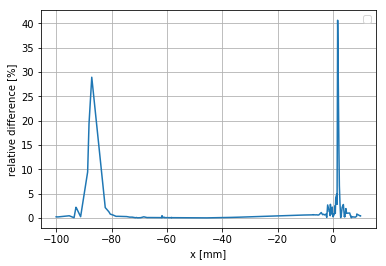

In [30]:
plt.plot(X_undmg, reldiff)
plt.legend()
plt.grid()
plt.xlabel('x [mm]')
plt.ylabel('relative difference [%]')
plt.show()